# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
#weather_api_key="8e8162ecd2b7306f308928b14125e97c"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        #print(json.dumps(city_weather,indent=4,sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | choibalsan
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | gaalkacyo
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | el fahs
Processing Record 16 of Set 1 | kabardinka
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | filadelfia
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | kirakira
Processing

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,288.76,81,0,4.63,ZA,1712860222
1,ushuaia,-54.8000,-68.3000,281.96,53,0,8.75,AR,1712860060
2,olonkinbyen,70.9221,-8.7187,264.71,76,100,4.60,SJ,1712860223
3,choibalsan,48.0667,114.5000,279.59,71,71,3.09,MN,1712860223
4,ribeira grande,38.5167,-28.7000,290.37,88,40,4.63,PT,1712860223


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,288.76,81,0,4.63,ZA,1712860222
1,ushuaia,-54.8000,-68.3000,281.96,53,0,8.75,AR,1712860060
2,olonkinbyen,70.9221,-8.7187,264.71,76,100,4.60,SJ,1712860223
3,choibalsan,48.0667,114.5000,279.59,71,71,3.09,MN,1712860223
4,ribeira grande,38.5167,-28.7000,290.37,88,40,4.63,PT,1712860223


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

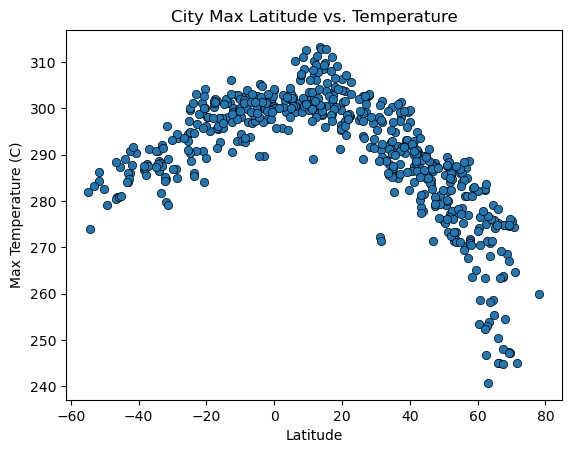

In [37]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.50)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")


# Save the figure
plt.savefig("../output_data/plot_1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

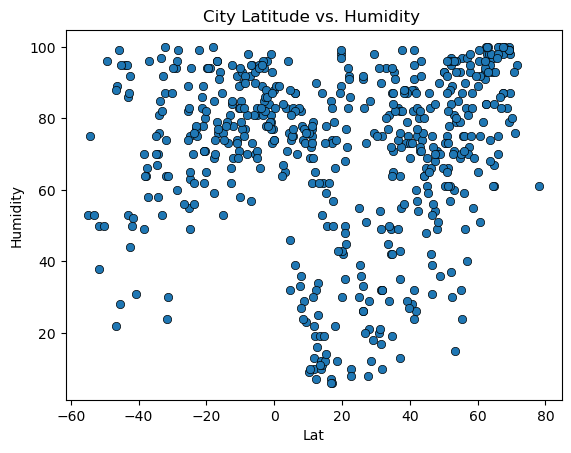

In [38]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity ")

# Save the figure
plt.savefig("../output_data/plot_2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

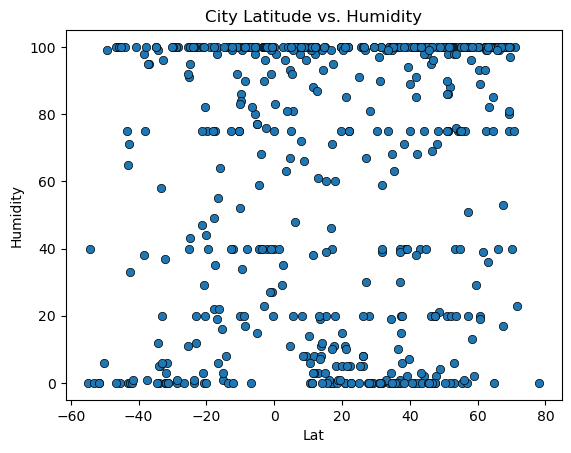

In [39]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/plot_3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

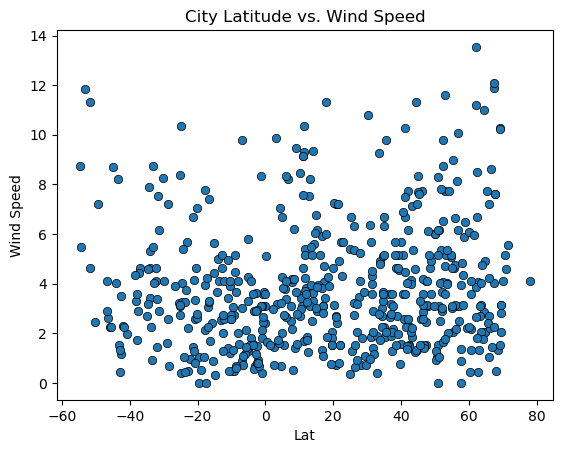

In [40]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/plot_4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,264.71,76,100,4.60,SJ,1712860223
3,choibalsan,48.0667,114.5000,279.59,71,71,3.09,MN,1712860223
4,ribeira grande,38.5167,-28.7000,290.37,88,40,4.63,PT,1712860223
7,bilibino,68.0546,166.4372,254.51,99,100,0.49,RU,1712860224
8,isafjordur,66.0755,-23.1240,275.17,75,100,7.20,IS,1712860224


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,288.76,81,0,4.63,ZA,1712860222
1,ushuaia,-54.8000,-68.3000,281.96,53,0,8.75,AR,1712860060
5,adamstown,-25.0660,-130.1015,294.74,55,91,8.38,PN,1712860061
6,port mathurin,-19.6833,63.4167,298.20,94,75,1.03,MU,1712860224
9,grytviken,-54.2811,-36.5092,274.06,75,40,5.47,GS,1712860198


###  Temperature vs. Latitude Linear Regression Plot

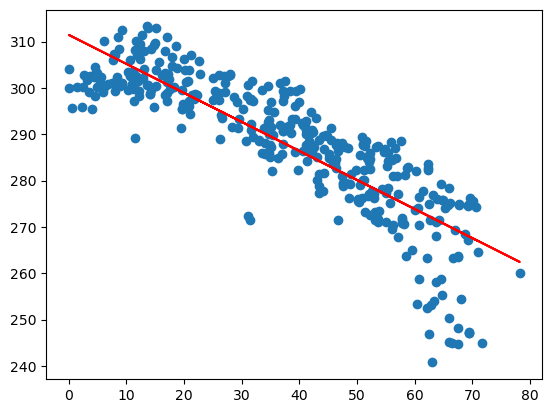

In [50]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression(x_values, y_values, 0.1, 0.1)
#LINE 3-6 I FOUND ON INTERNET HAVE NO IDEA HOW THIS WORK :)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

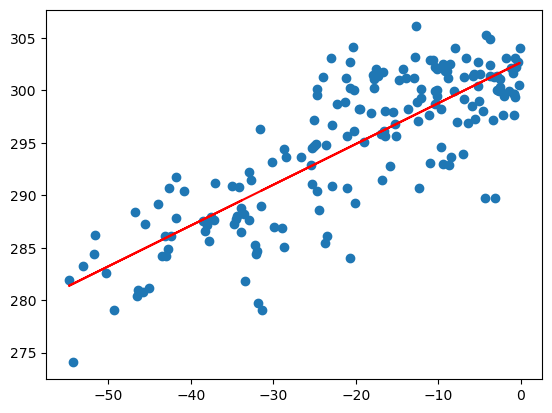

In [53]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

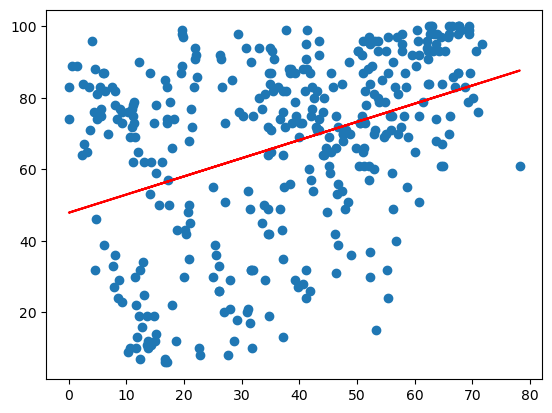

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()


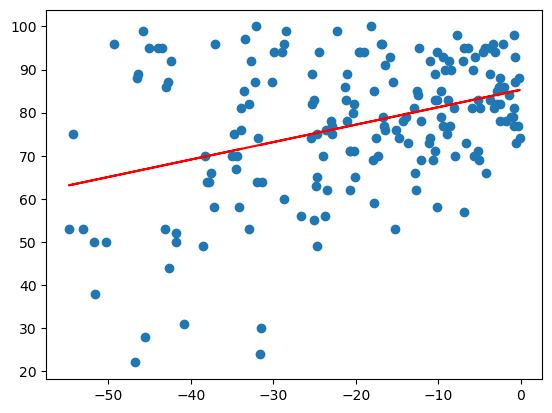

In [55]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

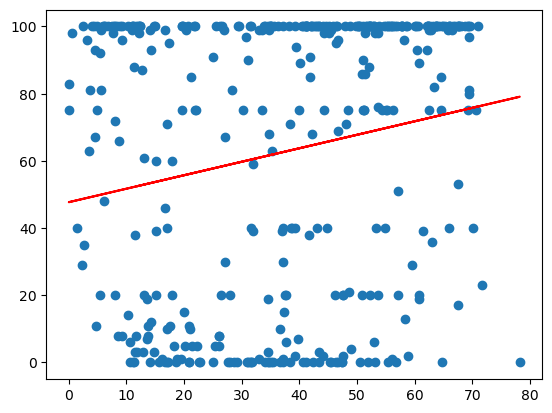

In [56]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()


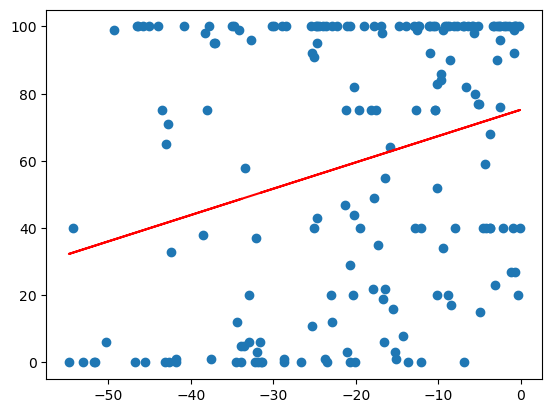

In [57]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

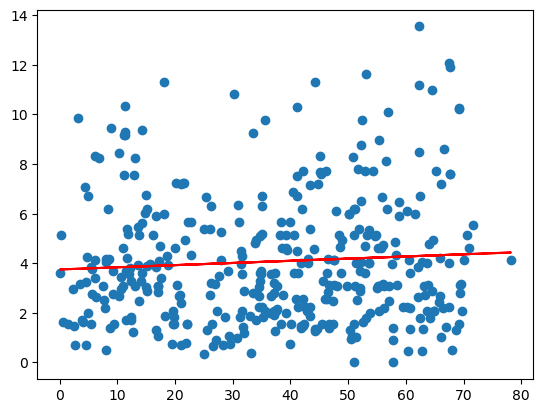

In [58]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

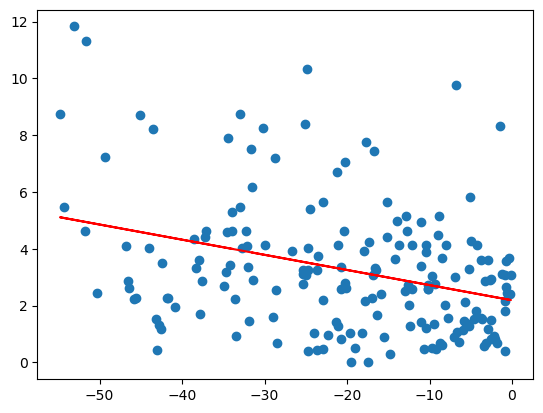

In [59]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, x_c=.1, y_c=.9)
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)    
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linear_regression(x_values, y_values, 0.4, 0.1)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE